# Problem Statement

## Attribute Information
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
heart = pd.read_csv('dataset.csv')

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.shape

(303, 14)

In [5]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
heart.thal.unique()

array([1, 2, 3, 0], dtype=int64)

In [10]:
heart.shape

(303, 14)

## Feature Selection

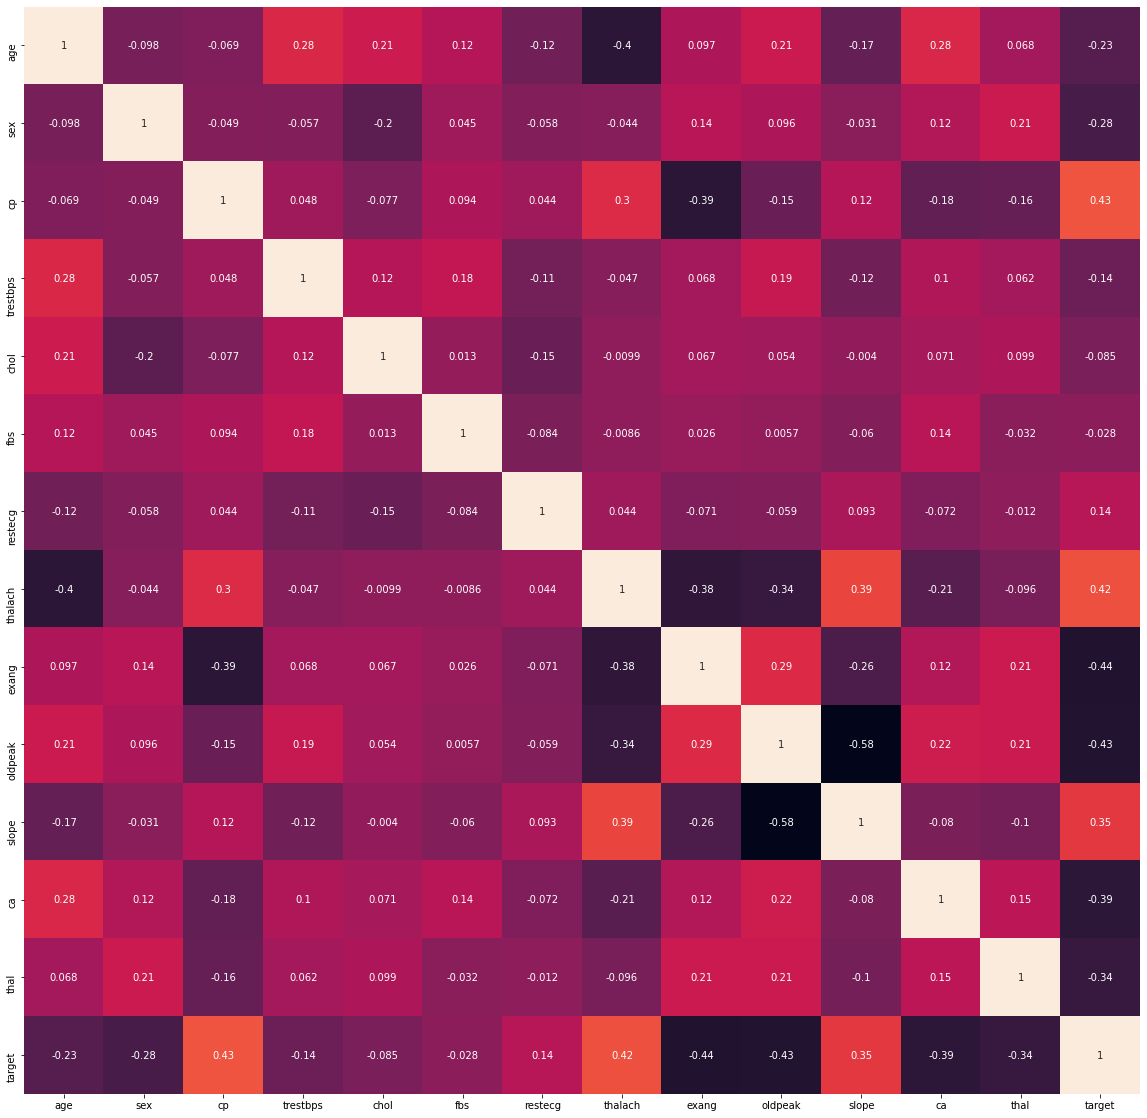

In [11]:
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(heart.corr(),annot=True, cbar=False)

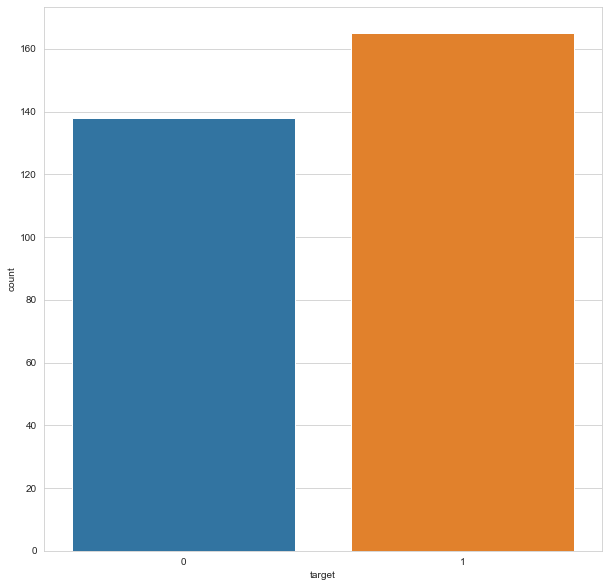

In [12]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.countplot(x='target',data=heart)
plt.show()

## Data Preprocessing

In [13]:
dataset = pd.get_dummies(heart, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'],drop_first=True)


In [14]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [ ]:
#testing

In [18]:
std_age = StandardScaler()
dataset.age = std_age.fit_transform(np.array(dataset.age).reshape(-1,1))

In [19]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [27]:
std_trestbps = StandardScaler()
dataset.trestbps = std_trestbps.fit_transform(np.array(dataset.trestbps).reshape(-1,1))

In [28]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [29]:
std_chol = StandardScaler()
dataset.chol = std_chol.fit_transform(np.array(dataset.chol).reshape(-1,1))

In [30]:
std_thalach = StandardScaler()
dataset.thalach = std_thalach.fit_transform(np.array(dataset.thalach).reshape(-1,1))

In [31]:
std_oldpeak = StandardScaler()
dataset.oldpeak = std_oldpeak.fit_transform(np.array(dataset.oldpeak).reshape(-1,1))

In [32]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [34]:
import pickle

In [35]:
scaler_file = open('age_scaler.pkl','wb')
pickle.dump(std_age, scaler_file)
scaler_file.close()

In [40]:
scaler_file = open('trestbps_scaler.pkl','wb')
pickle.dump(std_trestbps, scaler_file)
scaler_file.close()

In [38]:
scaler_file = open('chol_scaler.pkl','wb')
pickle.dump(std_chol, scaler_file)
scaler_file.close()

In [39]:
scaler_file = open('thalach_scaler.pkl','wb')
pickle.dump(std_thalach, scaler_file)
scaler_file.close()

In [41]:
scaler_file = open('oldpeak_scaler.pkl','wb')
pickle.dump(std_oldpeak, scaler_file)
scaler_file.close()

In [ ]:
#testing done

In [76]:

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [86]:
blood_pressure = float(58)
blood_pressure = standardScaler.fit_transform([[28],[35],[45],[1],[23],[45]])

In [87]:
blood_pressure

array([[-0.09935809],
       [ 0.36431298],
       [ 1.02670022],
       [-1.88780363],
       [-0.43055171],
       [ 1.02670022]])

In [62]:
standardScaler.fit_transform(np.array(24).reshape(-1,1))

array([[0.]])

In [15]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [16]:
dataset.slope_1.unique()

array([0, 1], dtype=uint8)

In [17]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [18]:
X = dataset.drop(['target'],axis=1)
Y = dataset.target

In [19]:
print(X.shape)
print(Y.shape)

(303, 22)
(303,)


## 1. KNN

In [20]:
knn_scores = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,Y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

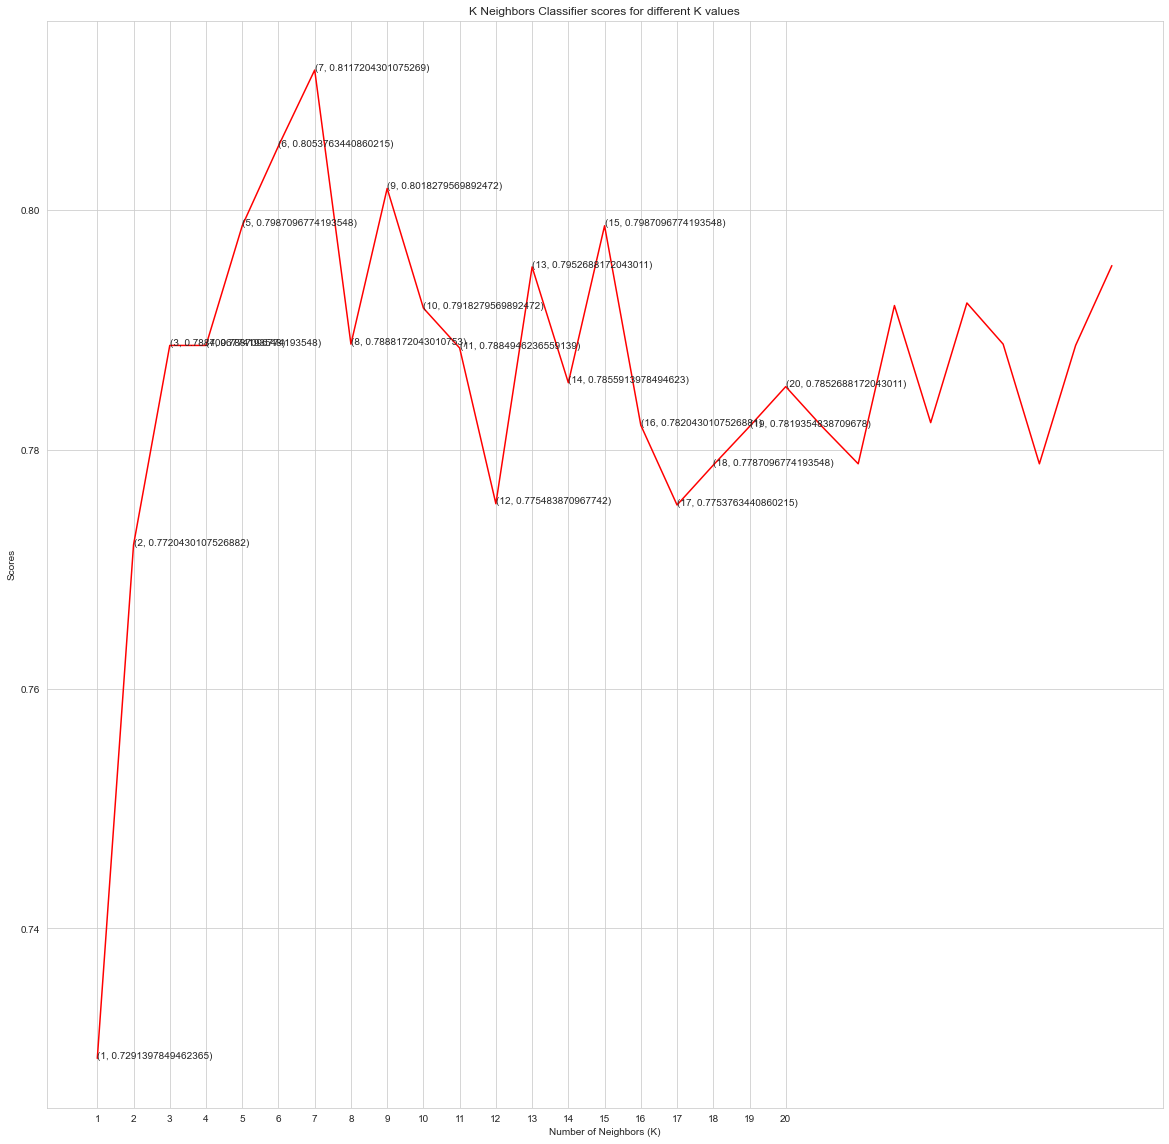

In [21]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 30)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors = 7)
score=cross_val_score(knn_classifier,X,Y,cv=10)

In [25]:
knn_classifier.fit(X,Y)
accuracy_score(Y,knn_classifier.predict(X))

0.8448844884488449

In [26]:
score.mean()

0.8117204301075269

In [27]:
import pickle

In [28]:
file = open('knn_heart_disease.pkl','wb')
pickle.dump(knn_classifier, file)
file.close()

## 2. Random Forest

In [ ]:
randomforest_classifier= RandomForestClassifier(random_state=0)

score=cross_val_score(randomforest_classifier,X,Y,cv=10)

In [ ]:
randomforest_classifier.fit(X,Y)
accuracy_score(Y,randomforest_classifier.predict(X))

In [ ]:
score.mean()

## 3. Decision Tree

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(random_state=12)
score=cross_val_score(decision_tree_classifier,X,Y,cv=10)

In [ ]:
decision_tree_classifier.fit(X,Y)
accuracy_score(Y,decision_tree_classifier.predict(X))

In [ ]:
score.mean()

# 4. Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=12)
score=cross_val_score(log_reg,X,Y,cv=10)

In [63]:
score.mean()

0.8612903225806452

In [65]:
log_reg.fit(X,Y)
# 

LogisticRegression(random_state=12)

In [24]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(Y,log_reg.predict(X))

0.8811881188118812

In [30]:
dta =[[0.952197,0.763956,-0.256334,0.015443,1.087338,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

In [116]:
res = log_reg.predict_proba(dta)

In [117]:
res[0][0]*100

38.85593550867241

In [118]:
res[0][1]*100

61.14406449132759

In [119]:
file = open('logistic_heart_disease_final.pkl','wb')
pickle.dump(log_reg, file)
file.close()

In [113]:
model = pickle.load(open('logistic_heart_disease_final.pkl', 'rb'))

In [88]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [114]:
# model = pickle.load(open('knn_heart_disease.pkl', 'rb'))

In [115]:
std_age = pickle.load(open('age_scaler.pkl','rb'))
std_trestbps = pickle.load(open('trestbps_scaler.pkl','rb'))
std_chol = pickle.load(open('chol_scaler.pkl','rb'))
std_thalach = pickle.load(open('thalach_scaler.pkl','rb'))
std_oldpeak = pickle.load(open('oldpeak_scaler.pkl','rb'))

In [116]:
age = std_age.transform(np.array(63).reshape(-1,1))
blood_pressure = std_trestbps.transform(np.array(145).reshape(-1,1))
cholestrol = std_chol.transform(np.array(233).reshape(-1,1))
heart_rate = std_thalach.transform(np.array(150).reshape(-1,1))
old_peak = std_oldpeak.transform(np.array(2.3).reshape(-1,1))

In [120]:
prediction = model.predict_proba([[age,blood_pressure,cholestrol,heart_rate,old_peak,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1]])

In [121]:
prediction

array([[0.77923454, 0.22076546]])

In [119]:
round(prediction[0][1]*100,2)

52.77